<a href="https://colab.research.google.com/github/mohamedrafik5/AI-ML-COURSE-PROGRESS/blob/main/Skewness_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Project_1_-_Weather_Dataset[1].csv')

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


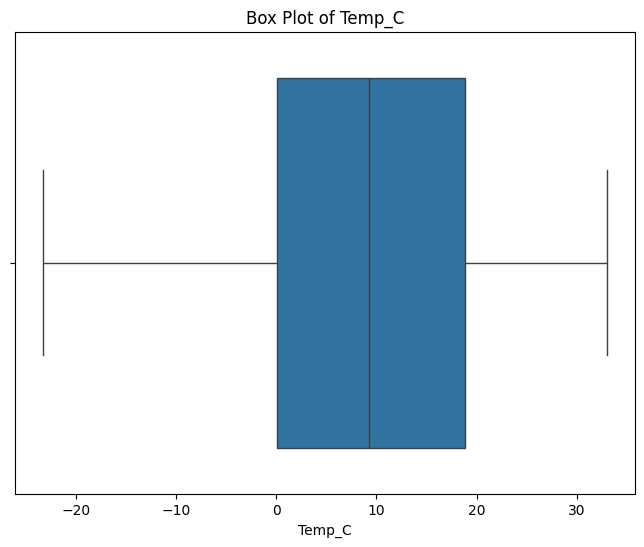

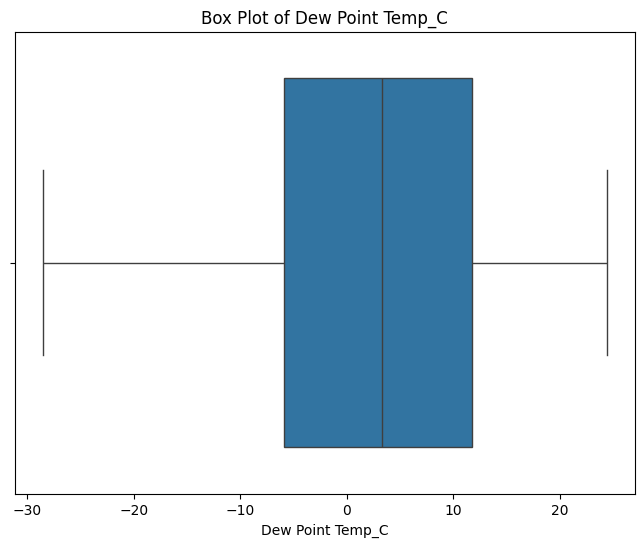

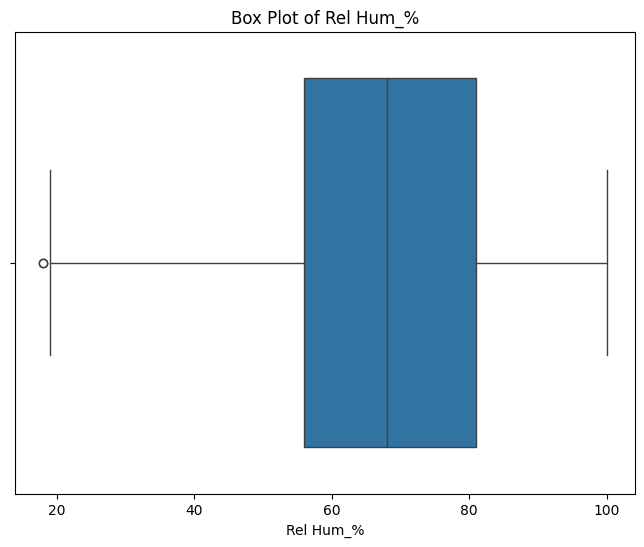

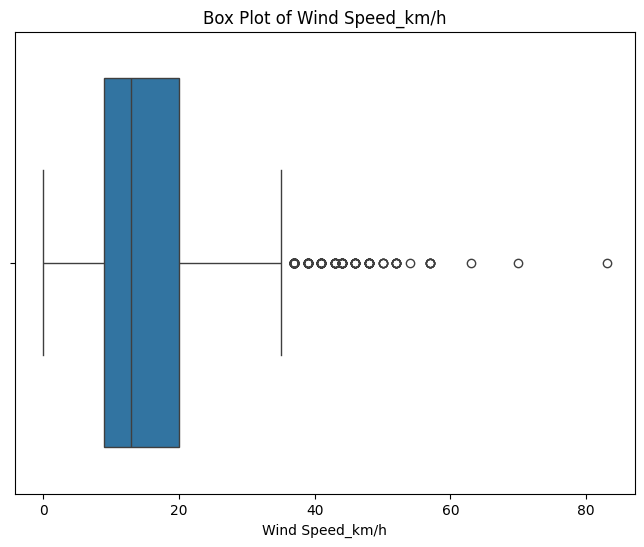

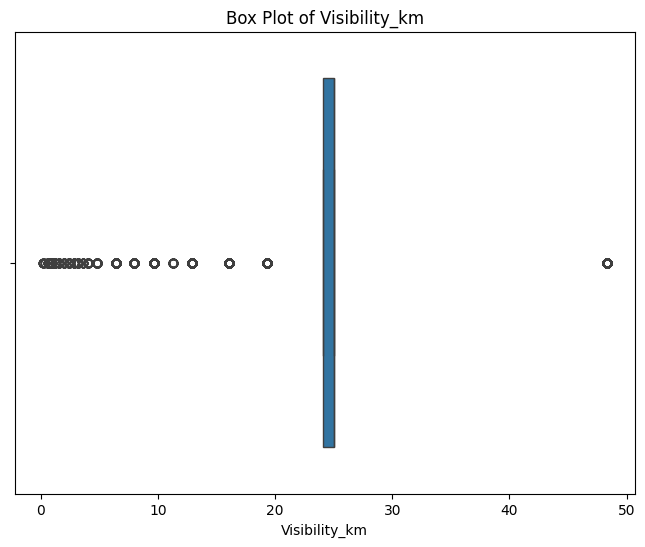

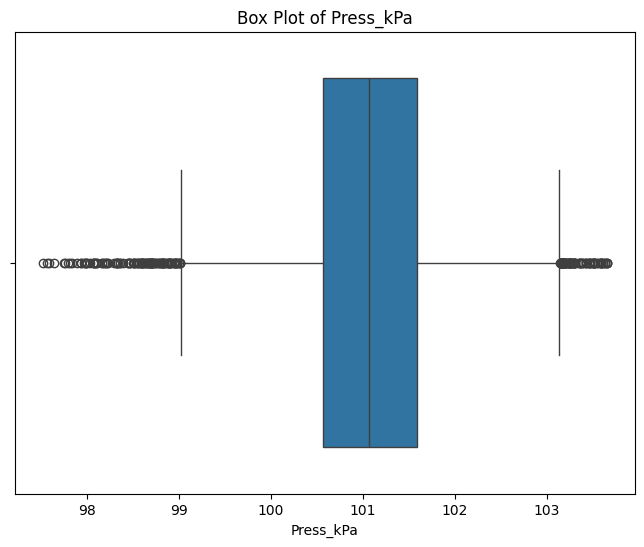

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [10]:
# Replace outliers in 'Rel Hum_%' with the median
import numpy as np
median_rel_hum = df['Rel Hum_%'].median()
Q1 = df['Rel Hum_%'].quantile(0.25)
Q3 = df['Rel Hum_%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Wind Speed_km/h'] = np.where(
    (df['Wind Speed_km/h'] < lower_bound) | (df['Wind Speed_km/h'] > upper_bound),
    median_rel_hum,
    df['Wind Speed_km/h']
)

print("Outliers in 'Rel Hum_%' after replacement:")
display(df[(df['Wind Speed_km/h'] < lower_bound) | (df['Wind Speed_km/h'] > upper_bound)][['Date/Time', 'Wind Speed_km/h']])

Outliers in 'Rel Hum_%' after replacement:


,Date/Time,Wind Speed_km/h


In [12]:
# Replace outliers in 'Visibility_km' with capping
Q1_vis = df['Visibility_km'].quantile(0.25)
Q3_vis = df['Visibility_km'].quantile(0.75)
IQR_vis = Q3_vis - Q1_vis
lower_bound_vis = Q1_vis - 1.5 * IQR_vis
upper_bound_vis = Q3_vis + 1.5 * IQR_vis

df['Visibility_km'] = np.where(
    df['Visibility_km'] < lower_bound_vis,
    lower_bound_vis,
    np.where(
        df['Visibility_km'] > upper_bound_vis,
        upper_bound_vis,
        df['Visibility_km']
    )
)

print("Outliers in 'Visibility_km' after capping:")
display(df[(df['Visibility_km'] < lower_bound_vis) | (df['Visibility_km'] > upper_bound_vis)][['Date/Time', 'Visibility_km']])

Outliers in 'Visibility_km' after capping:


,Date/Time,Visibility_km


In [14]:
# Replace outliers in 'Press_kPa' with capping
Q1_press = df['Press_kPa'].quantile(0.25)
Q3_press = df['Press_kPa'].quantile(0.75)
IQR_press = Q3_press - Q1_press
lower_bound_press = Q1_press - 1.5 * IQR_press
upper_bound_press = Q3_press + 1.5 * IQR_press

df['Press_kPa'] = np.where(
    df['Press_kPa'] < lower_bound_press,
    lower_bound_press,
    np.where(
        df['Press_kPa'] > upper_bound_press,
        upper_bound_press,
        df['Press_kPa']
    )
)

print("Outliers in 'Press_kPa' after capping:")
display(df[(df['Press_kPa'] < lower_bound_press) | (df['Press_kPa'] > upper_bound_press)][['Date/Time', 'Press_kPa']])

Outliers in 'Press_kPa' after capping:


,Date/Time,Press_kPa


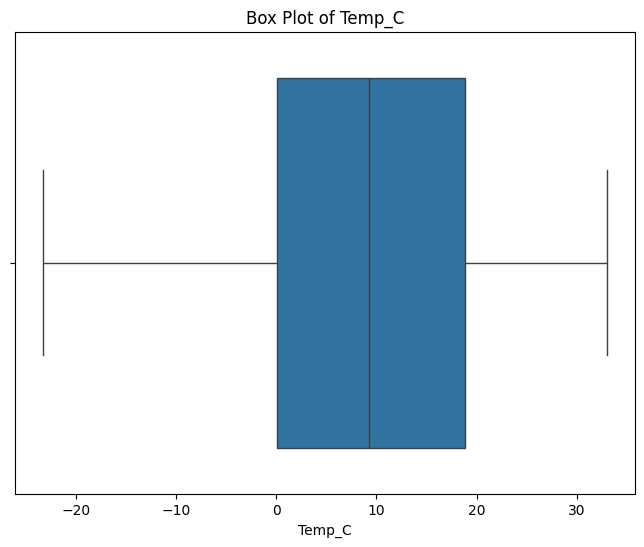

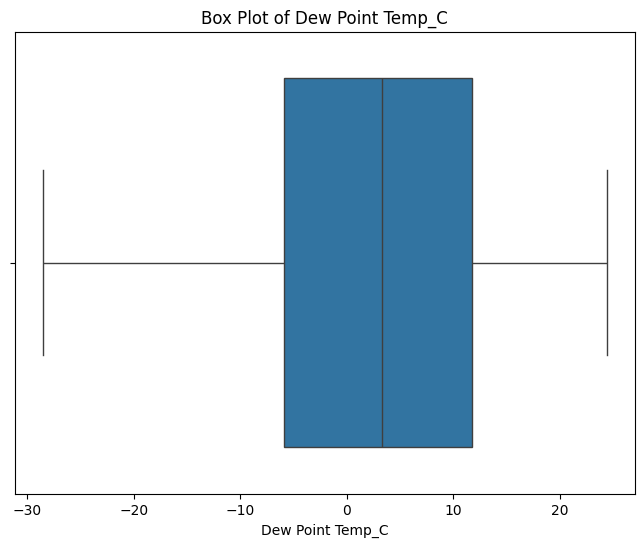

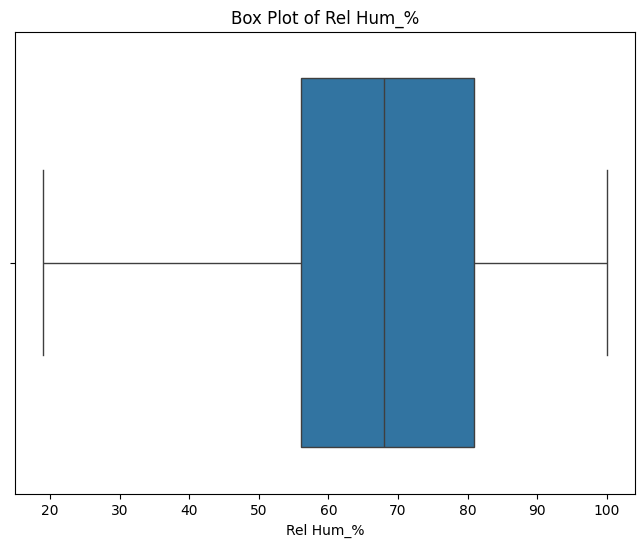

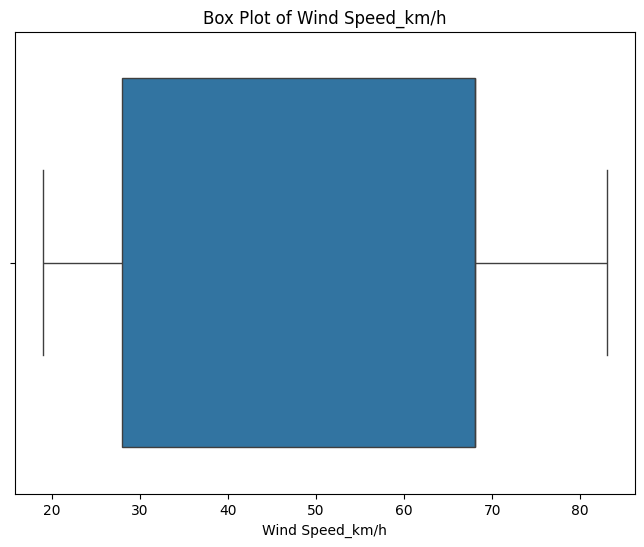

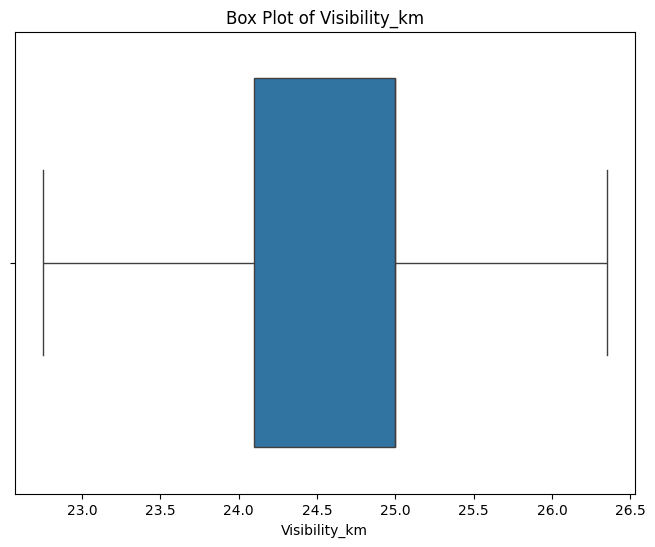

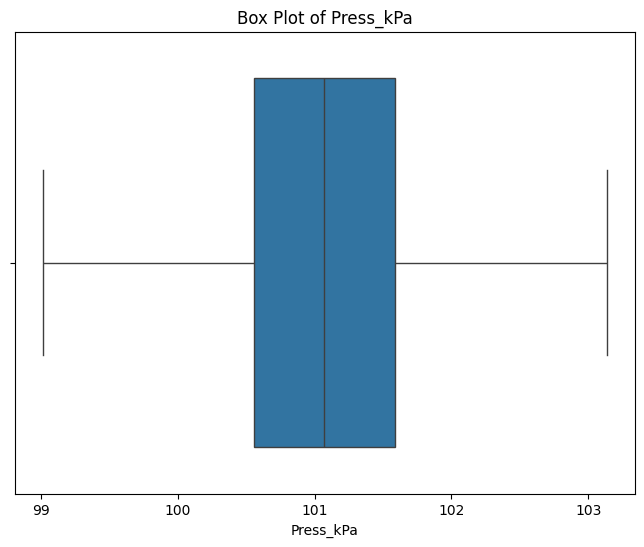

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

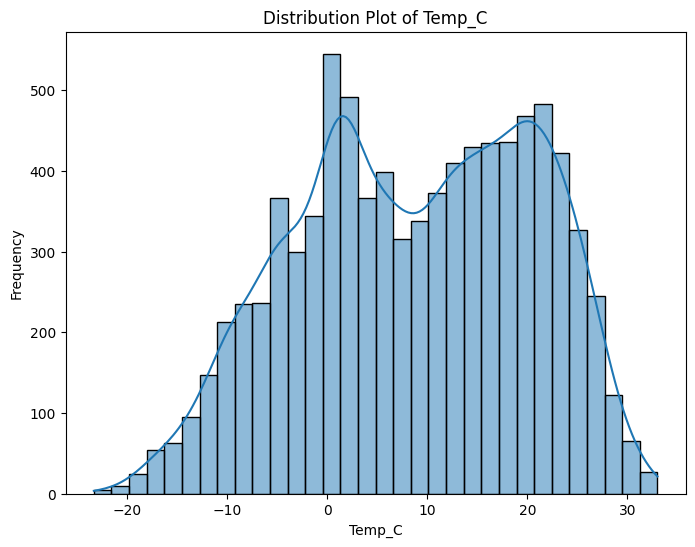

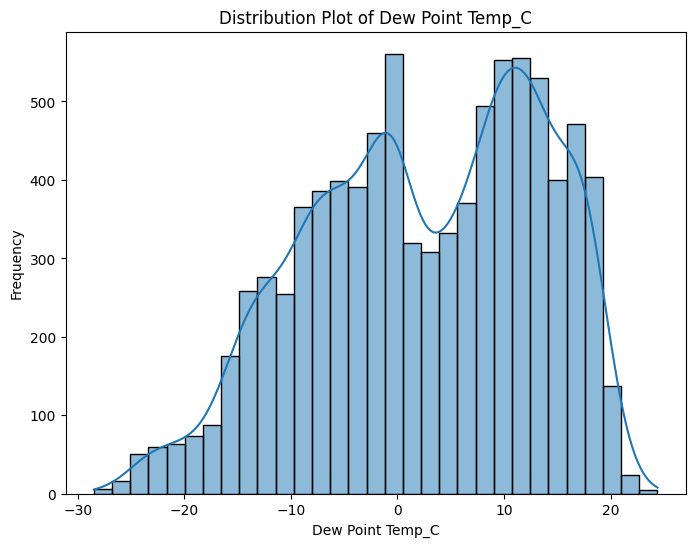

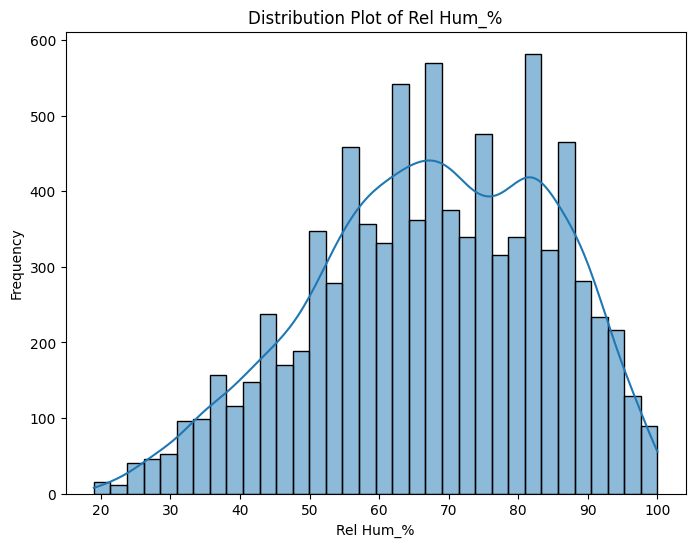

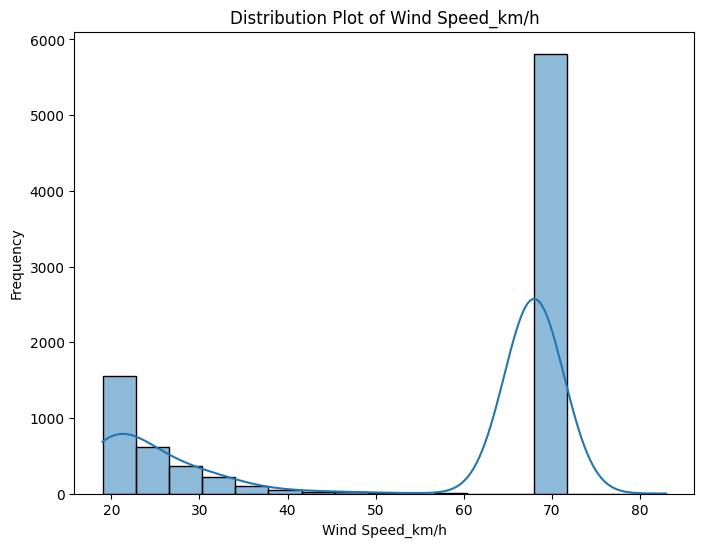

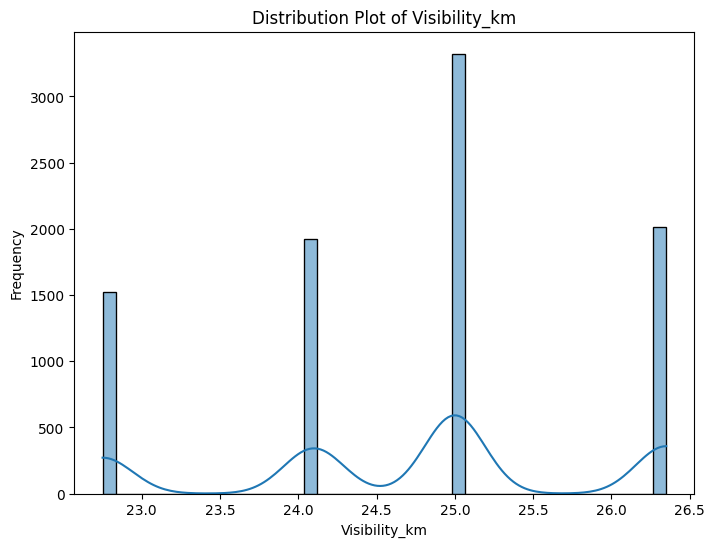

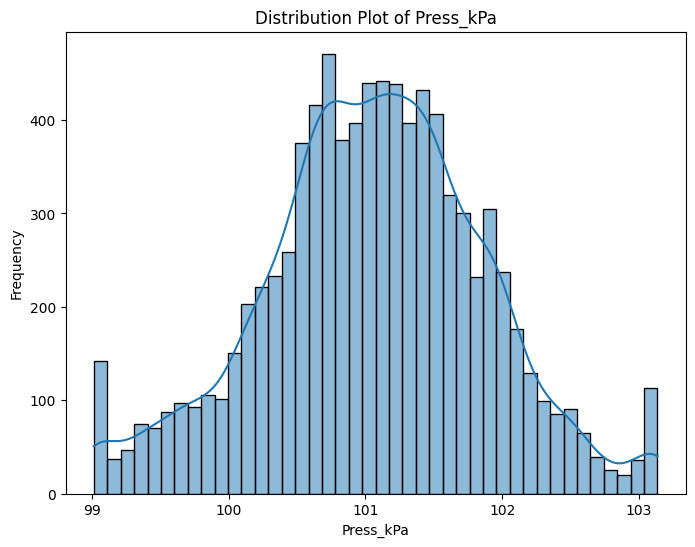

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

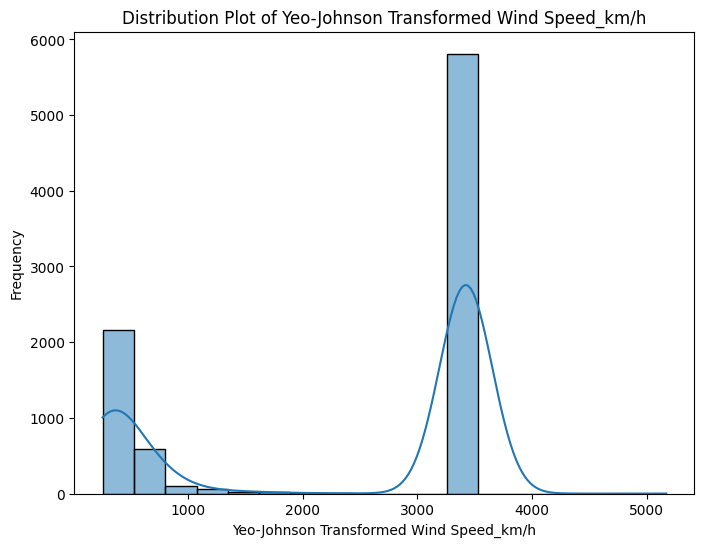

In [24]:
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation to 'Wind Speed_km/h'
df['Wind Speed_km/h_transformed'], _ = yeojohnson(df['Wind Speed_km/h'])

# Plot the distribution of the transformed column
plt.figure(figsize=(8, 6))
sns.histplot(df['Wind Speed_km/h_transformed'], kde=True)
plt.title('Distribution Plot of Yeo-Johnson Transformed Wind Speed_km/h')
plt.xlabel('Yeo-Johnson Transformed Wind Speed_km/h')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Check skewness for all numeric columns
skewness = df[numeric_cols].skew()
print("Skewness of numeric columns:")
display(skewness)

Skewness of numeric columns:


,0
Temp_C,-0.177666
Dew Point Temp_C,-0.318433
Rel Hum_%,-0.321101
Wind Speed_km/h,-0.762656
Visibility_km,-0.234436
Press_kPa,-0.096768
